In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
import plotly.express as px
import json, csv
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [78]:
df = pd.read_csv('raw_2022-07-01_2022-12-31.csv', parse_dates=True, date_parser={'STARTTIME':'%Y-%M-%d %H:%m:%s'})
df.head()

,STARTTIME,STARTLAT,STARTLON
0,2022-07-01 00:01:00,48.163559,11.52905
1,2022-07-01 00:03:00,48.119678,11.54820
2,2022-07-01 00:04:00,48.211021,11.66092
3,2022-07-01 00:07:00,48.088402,11.48060
4,2022-07-01 00:19:00,48.272709,11.56837


In [79]:
rslt_df = df.loc[(df['STARTLAT'] <= 48.214546) & (df['STARTLAT'] >=48.069449) & (df['STARTLON'] <= 11.711418) & (df['STARTLON'] >= 11.390774)]

In [80]:
rslt_df.shape

(356744, 3)

In [81]:
data = rslt_df[['STARTLAT', 'STARTLON']]

In [82]:
fig = px.scatter(data['STARTLAT'], data['STARTLON'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Basic KMeans model for basic data

In [83]:
kmeans_vanilla = KMeans(n_clusters = 20)
kmeans_vanilla.fit(data)
 
labels_vanilla = kmeans_vanilla.labels_
labels_vanilla

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([15, 10,  6, ..., 18, 18, 18], dtype=int32)

In [84]:
fig = px.scatter(x = data['STARTLAT'], y = data['STARTLON'], color = labels_vanilla, width=500, height=500)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Scaling + KMeans

In [85]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled

,STARTLAT,STARTLON
0,0.880577,-1.147958
1,-1.121972,-0.547820
2,3.046595,2.984750
3,-2.549330,-2.666327
4,0.279621,-0.654667
...,...,...
356739,0.809026,0.653743
356740,0.809026,0.653743
356741,0.809026,0.653743
356742,0.809026,0.653743


In [86]:
kmeans_scaled = KMeans(n_clusters = 25)
kmeans_scaled.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=25)

In [87]:
labels_scaled = kmeans_scaled.labels_
labels_scaled

array([22, 18, 19, ..., 13, 13, 13], dtype=int32)

In [88]:
fig = px.scatter(x = data_scaled['STARTLAT'], y = data_scaled['STARTLON'], color = labels_scaled, width=500, height=500)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [89]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }


In [90]:
sse = []
for k in range(1, 36):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(data_scaled)
   sse.append(kmeans.inertia_)

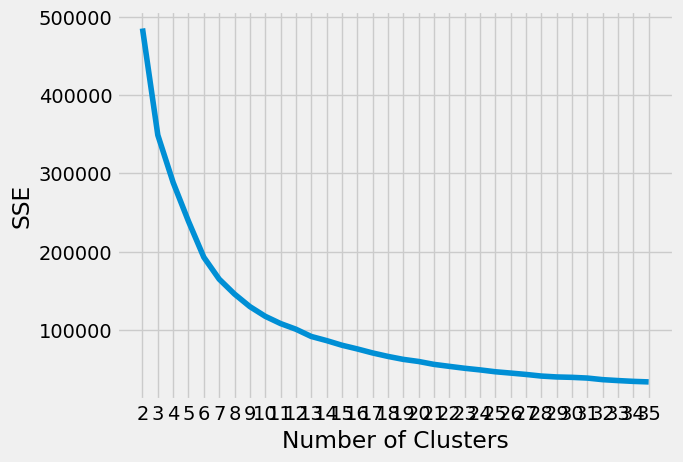

In [91]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 36), sse[1:])
plt.xticks(range(2, 36))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

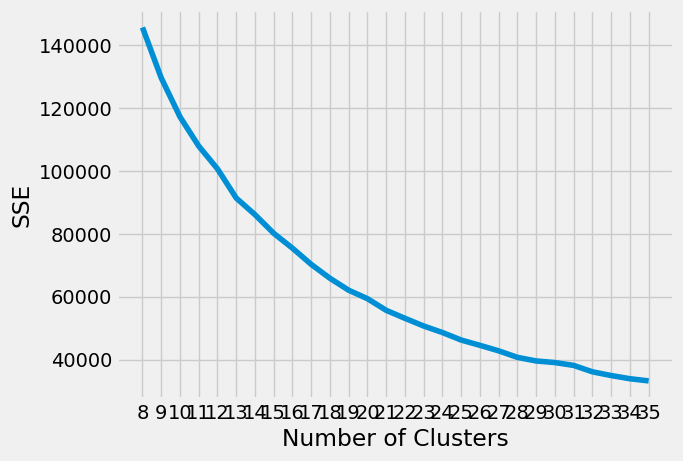

In [92]:
plt.style.use("fivethirtyeight")
plt.plot(range(8, 36), sse[7:])
plt.xticks(range(8, 36))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [93]:
# k = 9
kmeans_scaled = KMeans(n_clusters = 9)
kmeans_scaled.fit(data_scaled)
labels_scaled = kmeans_scaled.labels_
labels_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([8, 1, 5, ..., 0, 0, 0], dtype=int32)

In [94]:
fig = px.scatter(x = data_scaled['STARTLAT'], y = data_scaled['STARTLON'], color = labels_scaled, width=500, height=500)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [95]:
# k = 10
kmeans_scaled = KMeans(n_clusters = 10)
kmeans_scaled.fit(data_scaled)
labels_scaled = kmeans_scaled.labels_
labels_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([8, 6, 2, ..., 4, 4, 4], dtype=int32)

In [97]:
fig = px.scatter(x = data_scaled['STARTLAT'], y = data_scaled['STARTLON'], color = labels_scaled, width=500, height=500)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [59]:
kmeans_scaled = KMeans(n_clusters = 25)
kmeans_scaled.fit(data)
labels_scaled = kmeans_scaled.labels_
labels_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([24, 22,  4, ...,  6,  6,  6], dtype=int32)

In [72]:
data=data.reset_index().drop(columns='index')
data.head()

,STARTLAT,STARTLON
0,48.163559,11.52905
1,48.119678,11.54820
2,48.211021,11.66092
3,48.088402,11.48060
4,48.150391,11.54479


In [69]:
labels = pd.DataFrame(labels_scaled)
labels.shape

(356744, 1)

In [74]:
data_labels = pd.concat([data, labels], axis=1).rename(columns={0:'labels'})
data_labels.head()

,STARTLAT,STARTLON,labels
0,48.163559,11.52905,24
1,48.119678,11.54820,22
2,48.211021,11.66092,4
3,48.088402,11.48060,5
4,48.150391,11.54479,7


In [75]:
fig = px.scatter_mapbox(data_labels, lat='STARTLAT', lon='STARTLON', color = 'labels', zoom=10, opacity=0.7, mapbox_style='open-street-map', width=800, height=800, center = {"lat": 48.1351, "lon": 11.5820})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [63]:
fig = px.scatter(x = data['STARTLAT'], y = data['STARTLON'], color = labels_scaled, width=500, height=500)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [65]:
labels_scaled[:5]

array([24, 22,  4,  5,  7], dtype=int32)

Test